In [1]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/root/jupyter/SAs/batdongsan-datalake-v0-d1b3b2296e65.json'
from google.cloud import bigquery
bigquery_client = bigquery.Client(project='batdongsan-datalake-v0')

In [93]:
import pandas as pd
import numpy as np
import gc
import ipyparallel
from ipyparallel import Client
rc = Client()
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
query="""
SELECT visit_date, full_visitor_id, concat(unique_intraaday_id,visit_date) as session_id, 

start_time,

operating_system,
operating_system_version,
device_browser,
browser_version,
event_latitude,
event_longitude,
city,
country,
total_bounces,
total_visits,

case when total_visits =1 then 1 else 0 end as is_1st_user, 
total_hits,
total_page_views,
total_time_onsite,

custom_headless_session,
hits.BDS_user_id,
hits.custom_hash_IP,
hits.hit_is_interaction,
hits.hit_time,
hits.time_to_next_hit,
hits.content_group,
hits.previous_content_group,
hits.event_category,
hits.event_action,
hits.event_label,
hits.event_value,
hits.event_lead,
hits.event_lead_rcb,
hits.event_ldp_referred_from_srp,
hits.event_label_productid,
hits.hits_item_id,
hits.hits_item_type_id,
hits.hits_intent_type,
hits.hits_pagepath,
hits.hits_host_name,
hits.page_path_search_type,
hits.hit_number,
hits.hits_entrance,
hits.hits_exit,
hits.custom_event_pay_load,
hits.custom_referrer_page,
hits.custom_referrer_page_type,
hits.custom_SRP_result_count

# product.productSKU
# product.productListPosition
# product.productListName
FROM `batdongsan-datalake-v0.derived.ga_master_nested`
     AS ga_master_table
LEFT JOIN UNNEST(ga_master_table.hits) as hits
WHERE (ga_master_table.channel_grouping ) = 'Direct' AND (ga_master_table.device_category ) = 'desktop' 
and hits.hit_type="PAGE" and visit_date>='2021-01-01'
"""
job = bigquery_client.query(query)
df = job.to_dataframe()

In [167]:
df['total_bounces']=df['total_bounces'].fillna(0)

In [7]:
df['month'] = pd.DatetimeIndex(df['visit_date']).month

In [166]:
(df.query('content_group!="Home" & content_group!="Login Page" & content_group!="Account page"  & content_group!="Compose Listing Page"')
              .groupby(['month','visit_date','total_time_onsite','total_bounces','custom_hash_IP','session_id','operating_system','operating_system_version','device_browser','event_latitude','event_longitude','country'])['hits_pagepath']
              .nunique().reset_index().rename(columns = {'hits_pagepath':'count_page'})
)
        

,month,visit_date,total_time_onsite,total_bounces,custom_hash_IP,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page
0,7,2021-07-16,3.0,1.0,c4c44e95ee909b947a2d09a68a62ee04,435125778325257141816264406142021-07-16,Windows,10,Chrome,21.0278,105.8342,Vietnam,1
1,7,2021-07-16,5.0,1.0,d75c6e3aa3ee01effdab73a7184ff507,270019459428334385016264037282021-07-16,Windows,10,Coc Coc,17.4659,106.5984,Vietnam,1
2,7,2021-07-16,7.0,1.0,32dca378df2c228a5c9c1efc78744c97,190378531116673279416264078932021-07-16,Windows,7,Chrome,21.0278,105.8342,Vietnam,1
3,7,2021-07-16,17.0,1.0,f4ceb0b158cb1e1e9333915b194e8a3f,336634447716371745716264240082021-07-16,Macintosh,Intel 10.15,Safari,0.0000,0.0000,Vietnam,1
4,7,2021-07-16,833.0,1.0,83590e8bb1ae6f56fd8446ff3253552c,904295058561415300916264231062021-07-16,Windows,7,Chrome,21.0278,105.8342,Vietnam,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,8,2021-08-08,3.0,1.0,158b694932244a089e5f4f57455010fd,390715527862693820516284170782021-08-08,Windows,7,Chrome,20.8449,106.6881,Vietnam,1
124,8,2021-08-08,4.0,1.0,a19d14a286b35b4cda36e3728d411916,408334678141636913316283514442021-08-08,Windows,10,Chrome,16.4637,107.5909,Vietnam,1
125,8,2021-08-08,18.0,1.0,64e5de70d2c06f45417bb92a80572886,721231635585344914616284275742021-08-08,Windows,10,Chrome,10.8231,106.6297,Vietnam,1
126,8,2021-08-08,18.0,1.0,acbc879bbb5dd15b26767b4c319dfcae,20163053987169890316284048112021-08-08,Windows,10,Chrome,10.8231,106.6297,Vietnam,1


In [ ]:
'content_group!="Home" & content_group!="Login Page" & content_group!="Account page"  & content_group!="Compose Listing Page"

In [168]:
df_summary = (df.query('content_group!="Home" & content_group!="Login Page" & content_group!="Account page"  & content_group!="Compose Listing Page"')
              .groupby(['month','visit_date','total_time_onsite','total_bounces','custom_hash_IP','session_id','operating_system','operating_system_version','device_browser','event_latitude','event_longitude','country'])['hits_pagepath']
              .nunique().reset_index().rename(columns = {'hits_pagepath':'count_page'})
 .merge(df.query('content_group=="Search Result - For Sale" | content_group=="Search Result - For Rent" ')
 .groupby(['session_id'])['hits_pagepath'].nunique().reset_index().rename(columns = {'hits_pagepath':'count_srp'}),
        on=['session_id'], how='left')
 .merge(df.query('content_group=="Listing Details"')
 .groupby(['session_id'])['hits_pagepath'].nunique().reset_index().rename(columns = {'hits_pagepath':'count_lpd'}),
        on=['session_id'], how='left')
 .merge(df.query('(custom_referrer_page_type != "Direct" |custom_referrer_page_type.isnull() ) & (content_group!="Home" & content_group!="Login Page" & content_group!="Account page"  & content_group!="Compose Listing Page" )')
            .groupby(['session_id'])['hits_pagepath'].nunique()
            .reset_index().rename(columns = {'hits_pagepath':'count_not_direct_page'}),
        on=['session_id'],how='left')
            .merge(df.query('custom_referrer_page_type == "Direct" & (content_group!="Home" & content_group!="Login Page" & content_group!="Account page" &  content_group!="Compose Listing Page" )')
            .groupby(['session_id'])['hits_pagepath'].nunique()
                   .reset_index().rename(columns = {'hits_pagepath':'count_direct_page'}),
        on=['session_id'], how='left')
           )



In [163]:
df_summary.query('count_page>1')

,month,visit_date,total_time_onsite,total_bounces,custom_hash_IP,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page


In [153]:
df.content_group.unique()

array(['Search Result - For Sale', 'Listing Details',
       'Compose Listing Page', '(not set)', 'Account page',
       'Search Result - For Rent', 'Home', 'Article Details',
       'Login Page', 'SellerNet', 'Project Details', 'Map search'],
      dtype=object)

In [111]:
df_summary=df_summary.merge(df[['custom_hash_IP','session_id']].drop_duplicates(), on='session_id', how='left')

In [173]:
(df_summary
 .query('(count_page>10&count_direct_page==count_page)|count_page>100').sort_values(by='count_page', ascending=False)
 .groupby('month')['session_id'].count()
)

month
7    2284
8    1202
Name: session_id, dtype: int64

In [171]:
df_summary.count()

month                       119611
visit_date                  119611
total_time_onsite           119611
total_bounces               119611
custom_hash_IP              119611
session_id                  119611
operating_system            119611
operating_system_version    119611
device_browser              119611
event_latitude              119611
event_longitude             119611
country                     119611
count_page                  119611
count_srp                    88544
count_lpd                    53563
count_not_direct_page        54113
count_direct_page            77323
dtype: int64

In [16]:
df_summary.session_id.count()

7341356

In [164]:
df_summary.query('count_page>30').session_id.count()

0

In [27]:
23540/7341356

0.0032064920976451763

In [20]:
df_summary.groupby(['count_page'])['session_id'].count().reset_index().sort_values(by='count_page', ascending=True).head(20)

,count_page,session_id
0,1,5851536
1,2,253275
2,3,162428
3,4,115855
4,5,93032
5,6,71068
6,7,66666
7,8,53890
8,9,45906
9,10,223421


In [18]:
(5851536+253275+162428+115855+93032+223421+45906+)

6476126

In [11]:
df.content_group.unique()

array(['Search Result - For Sale', 'Listing Details',
       'Compose Listing Page', '(not set)', 'Account page',
       'Search Result - For Rent', 'Home', 'Article Details',
       'Login Page', 'SellerNet', 'Project Details', 'Map search'],
      dtype=object)

In [15]:
import gc
gc.collect()

9

In [29]:
df_summary.query('count_page>30')

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd
10,1,100033166047104359316099134922021-01-06,Windows,10,Chrome,10.8231,106.6297,Vietnam,62,9.0,8.0
20,1,100033166047104359316101040022021-01-08,Windows,10,Chrome,10.8231,106.6297,Vietnam,43,13.0,6.0
41,1,100122763359833381416094995182021-01-01,Windows,7,Firefox,10.8231,106.6297,Vietnam,143,78.0,46.0
57,1,100200945508573224016100855842021-01-08,Windows,7,Chrome,10.8231,106.6297,Vietnam,33,NaN,NaN
62,1,100200945508573224016103266742021-01-11,Windows,7,Chrome,10.8231,106.6297,Vietnam,34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7341254,8,99683210825168820016281551442021-08-05,Windows,10,Chrome,10.8231,106.6297,Vietnam,50,NaN,50.0
7341261,8,997167014912704216283308822021-08-07,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,39,NaN,39.0
7341287,8,99783832030496229716282242472021-08-06,Windows,10,Chrome,10.8231,106.6297,Vietnam,50,NaN,50.0
7341322,8,99879670360239370816282589232021-08-06,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,36,36.0,NaN


In [41]:
df_summary=(df_summary.merge(df.query('custom_referrer_page_type != "Direct" |custom_referrer_page_type.isnull()')
            .groupby(['month','session_id','total_time_onsite','total_bounces','operating_system','operating_system_version','device_browser','event_latitude','event_longitude','country'])['hits_pagepath'].count()
            .reset_index().rename(columns = {'hits_pagepath':'count_not_direct_page'}),
        on=['month','session_id','operating_system','operating_system_version','device_browser','event_latitude','event_longitude','country'],
            how='left')
            .merge(df.query('custom_referrer_page_type == "Direct"')
            .groupby(['month','session_id','operating_system','operating_system_version','device_browser','event_latitude','event_longitude','country'])['hits_pagepath'].count()
                   .reset_index().rename(columns = {'hits_pagepath':'count_direct_page'}),
        on=['month','session_id','operating_system','operating_system_version','device_browser','event_latitude','event_longitude','country'], how='left')
           )


In [45]:
df_summary.count()

month                       7341356
session_id                  7341356
operating_system            7341356
operating_system_version    7341356
device_browser              7341356
event_latitude              7341356
event_longitude             7341356
country                     7341356
count_page                  7341356
count_srp                   2435587
count_lpd                   4452818
count_not_direct_page       1728173
count_direct_page           6398849
dtype: int64

In [46]:
df_summary=df_summary.merge(df[['session_id','total_time_onsite','total_bounces']].drop_duplicates(), on = 'session_id', how='inner')

In [35]:
df[df.custom_referrer_page_type.isnull()].T

,134,4411,14899,16265,19699,21253,23519,25216,26307,29369,...,25859558,25859559,25859560,25859561,25859562,25859563,25859564,25859565,25859566,25859567
visit_date,2021-06-14,2021-06-07,2021-02-17,2021-02-16,2021-06-18,2021-02-17,2021-02-27,2021-07-18,2021-07-16,2021-06-16,...,2021-01-07,2021-01-07,2021-01-07,2021-01-07,2021-01-07,2021-01-07,2021-01-07,2021-01-07,2021-01-07,2021-01-07
full_visitor_id,6683151195043211685,1808188040762215940,474505359955630740,1395964174967465353,1764744231815746086,1300350669564654670,3234305809394004616,6497413435955092472,3459004999255828671,3922602416268738685,...,6856360693361533954,3716762986152876692,3978496871518911570,5120270543691531627,1399030966295309596,6675140724539971834,3212760664294174612,8962770585612669986,3952713534314113765,8614345667301962965
session_id,668315119504321168516236650642021-06-14,180818804076221594016230556282021-06-07,47450535995563074016135358922021-02-17,139596417496746535316134469612021-02-16,176474423181574608616239867252021-06-18,130035066956465467016135391612021-02-17,323430580939400461616144342142021-02-27,649741343595509247216266106812021-07-18,345900499925582867116264501062021-07-16,392260241626873868516238183722021-06-16,...,685636069336153395416099919612021-01-07,371676298615287669216099805642021-01-07,397849687151891157016100025102021-01-07,512027054369153162716100050202021-01-07,139903096629530959616100082972021-01-07,667514072453997183416099888622021-01-07,321276066429417461216100060202021-01-07,896277058561266998616100082192021-01-07,395271353431411376516099829092021-01-07,861434566730196296516100129212021-01-07
start_time,2021-06-14 10:04:24+00:00,2021-06-07 08:47:08+00:00,2021-02-17 04:24:52+00:00,2021-02-16 03:42:41+00:00,2021-06-18 03:25:25+00:00,2021-02-17 05:19:21+00:00,2021-02-27 13:56:54+00:00,2021-07-18 12:18:01+00:00,2021-07-16 15:41:46+00:00,2021-06-16 04:39:32+00:00,...,2021-01-07 03:59:21+00:00,2021-01-07 00:49:24+00:00,2021-01-07 06:55:10+00:00,2021-01-07 07:37:00+00:00,2021-01-07 08:31:37+00:00,2021-01-07 03:07:42+00:00,2021-01-07 07:53:40+00:00,2021-01-07 08:30:19+00:00,2021-01-07 01:28:29+00:00,2021-01-07 09:48:41+00:00
operating_system,Macintosh,Windows,Macintosh,Windows,Windows,Windows,Windows,Windows,Windows,Windows,...,Windows,Macintosh,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows
operating_system_version,Intel 10.15,10,Intel 10.15,Vista,10,10,7,7,10,8.1,...,10,Intel 11.1,10,7,7,10,10,10,10,10
device_browser,Safari,Chrome,Safari,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,...,Chrome,Chrome,Chrome,Internet Explorer,Coc Coc,Chrome,Coc Coc,Chrome,Coc Coc,Chrome
browser_version,14.1.1,90.0.4430.212,13.0.5,49.0.2623.112,91.0.4472.101,88.0.4324.150,88.0.4324.182,69.0.3497.100,91.0.4472.164,91.0.4472.101,...,87.0.4280.88,87.0.4280.88,87.0.4280.88,11.0,91.0.146,87.0.4280.88,91.0.146,87.0.4280.88,91.0.146,87.0.4280.88
event_latitude,10.9241,16.0544,21.1188,41.1595,21.0278,21.0278,10.9330,21.0278,21.2816,10.8231,...,10.8231,12.6662,10.9241,37.5665,21.1162,10.8231,21.0278,10.8231,12.8500,21.1162
event_longitude,106.7130,108.2022,105.9598,-81.4404,105.8342,105.8342,107.2437,105.8342,105.7250,106.6297,...,106.6297,108.0382,106.7130,126.9780,105.4953,106.6297,105.8342,106.6297,108.2542,105.4953


In [59]:
df_summary.query('count_page>30&count_direct_page>0 &count_not_direct_page>0').sort_values(by='count_page', ascending=False)

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page
1177885,3,579410469431955150616163195052021-03-21,Windows,10,Chrome,21.0278,105.8342,Vietnam,500,NaN,NaN,81.0,419.0,589.0,NaN,1.178000
7338966,8,92968688305837472816279696082021-08-03,Linux,x86_64,Chrome,10.8231,106.6297,Vietnam,500,461.0,NaN,1.0,499.0,843.0,NaN,1.686000
2820140,4,838004640951556732616183810232021-04-14,Windows,10,Chrome,21.0278,105.8342,Vietnam,500,NaN,NaN,1.0,499.0,889.0,NaN,1.778000
2900041,4,888096541300114453116183892032021-04-14,Windows,10,Chrome,21.0278,105.8342,Vietnam,500,NaN,NaN,1.0,499.0,901.0,NaN,1.802000
2780615,4,813083419633926659316173353282021-04-02,Windows,10,Chrome,21.0278,105.8342,Vietnam,500,NaN,NaN,54.0,446.0,1658.0,NaN,3.316000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714527,3,236942093067498507116160740902021-03-18,Macintosh,Intel 10.14,Safari,10.8231,106.6297,Vietnam,31,NaN,5.0,27.0,4.0,4399.0,NaN,141.903226
5846932,7,240203978995959328716256361672021-07-07,Windows,10,Chrome,21.0278,105.8342,Vietnam,31,5.0,26.0,1.0,30.0,28.0,NaN,0.903226
2053953,4,3527650075543463916181285152021-04-11,Windows,10,Chrome,10.8231,106.6297,Vietnam,31,9.0,NaN,22.0,9.0,1074.0,NaN,34.645161
2056747,4,354611414296558688216182055652021-04-12,Windows,7,Chrome,10.8231,106.6297,Vietnam,31,22.0,9.0,30.0,1.0,1446.0,NaN,46.645161


In [60]:
df_summary.query('event_latitude=="21.0278"&event_longitude=="105.8342"')

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page
1,1,100006717638641846116112903972021-01-22,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,1,NaN,1.0,1.0,NaN,4.0,NaN,4.000000
2,1,100022605152192174516115473452021-01-25,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,1,NaN,1.0,1.0,NaN,3.0,NaN,3.000000
4,1,10002601465916845516115816382021-01-25,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,1,NaN,1.0,1.0,NaN,4.0,NaN,4.000000
5,1,100026447000094549116103570602021-01-11,Windows,10,Chrome,21.0278,105.8342,Vietnam,5,3.0,1.0,5.0,NaN,92.0,NaN,18.400000
8,1,100030165583100985116113239632021-01-22,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,1,NaN,1.0,1.0,NaN,3.0,NaN,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7341302,8,99817555684215848916283058172021-08-07,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,7,NaN,7.0,NaN,7.0,61.0,NaN,8.714286
7341306,8,99827462026263761616281027042021-08-05,Windows,8.1,Chrome,21.0278,105.8342,Vietnam,5,1.0,4.0,NaN,5.0,8.0,NaN,1.600000
7341313,8,99842898997703396816279462232021-08-03,Macintosh,Intel 10.13,Chrome,21.0278,105.8342,Vietnam,1,1.0,NaN,NaN,1.0,NaN,1.0,NaN
7341322,8,99879670360239370816282589232021-08-06,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,36,36.0,NaN,18.0,18.0,211.0,NaN,5.861111


In [83]:
df_summary.query('count_page>100&month>2')

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page
529040,3,100035907525251790616150517962021-03-07,Macintosh,Intel 11.2,Chrome,39.8680,-104.9719,United States,253,NaN,253.0,NaN,253.0,4093.0,NaN,16.177866
529462,3,100346273458660645916169336862021-03-28,Windows,8,Chrome,21.0278,105.8342,Vietnam,164,10.0,154.0,1.0,163.0,903.0,NaN,5.506098
529489,3,100371100946461405316154287722021-03-11,Windows,10,Chrome,16.0544,108.2022,Vietnam,150,NaN,150.0,NaN,150.0,601.0,NaN,4.006667
529676,3,100499206935510669316151280742021-03-07,Windows,7,Coc Coc,0.0000,0.0000,Vietnam,116,65.0,50.0,116.0,NaN,3066.0,NaN,26.431034
529680,3,100499206935510669316156343352021-03-13,Windows,7,Coc Coc,21.1162,105.4953,Vietnam,184,101.0,81.0,183.0,1.0,6976.0,NaN,37.913043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7340853,8,98451201174267065016278444102021-08-02,Windows,10,Chrome,-7.0250,110.8911,Indonesia,147,7.0,140.0,NaN,147.0,1100.0,NaN,7.482993
7340874,8,98501151214439118016280074362021-08-03,(not set),(not set),function l,10.8231,106.6297,Vietnam,251,100.0,151.0,NaN,251.0,579.0,NaN,2.306773
7340896,8,98559999567817378316277940082021-08-01,Macintosh,Intel 10.15,Chrome,1.3554,103.8677,Singapore,195,NaN,195.0,NaN,195.0,3467.0,NaN,17.779487
7341116,8,99206408037303870816283889802021-08-08,Windows,10,Chrome,21.0278,105.8342,Vietnam,250,219.0,31.0,31.0,219.0,441.0,NaN,1.764000


In [112]:
(df_summary.query('count_page>5&count_direct_page==count_page&(count_srp.notnull()|count_lpd.notnull())')
)

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page,custom_hash_IP
312792,2,100377107028629308916144405452021-02-27,Windows,10,Chrome,10.8231,106.6297,Vietnam,250,250.0,NaN,NaN,250.0,1204.0,NaN,4.816000,None
313132,2,101731179650011624416140336862021-02-23,Windows,10,Firefox,10.8231,106.6297,Vietnam,12,NaN,12.0,NaN,12.0,726.0,NaN,60.500000,None
313468,2,102857815284764623416141593882021-02-24,Windows,10,Firefox,10.8231,106.6297,Vietnam,8,NaN,8.0,NaN,8.0,354.0,NaN,44.250000,None
314177,2,10534623789559084116138085682021-02-20,Linux,x86_64,Chrome,10.8231,106.6297,Vietnam,30,30.0,NaN,NaN,30.0,276.0,NaN,9.200000,None
314188,2,105408621702185111116143497992021-02-26,Windows,7,Chrome,16.0544,108.2022,Vietnam,21,1.0,20.0,NaN,21.0,90.0,NaN,4.285714,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422387,8,99817555684215848916283058172021-08-07,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,7,NaN,7.0,NaN,7.0,61.0,NaN,8.714286,None
7422402,8,99859403698053879516282003632021-08-06,Windows,10,Chrome,10.8231,106.6297,Vietnam,10,10.0,NaN,NaN,10.0,79.0,NaN,7.900000,b6ed44d74c3a2c9524a6e60e9ee8563f
7422403,8,99859403698053879516282003632021-08-06,Windows,10,Chrome,10.8231,106.6297,Vietnam,10,10.0,NaN,NaN,10.0,79.0,NaN,7.900000,None
7422414,8,99896218010228660216281715302021-08-05,Windows,10,Chrome,10.8231,106.6297,Vietnam,50,NaN,50.0,NaN,50.0,104.0,NaN,2.080000,1238da22133c5c492b5b532ceadbbb6d


In [152]:
(df_summary.query('count_page>10&count_direct_page==count_page')
)

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page,custom_hash_IP,bot
312792,2,100377107028629308916144405452021-02-27,Windows,10,Chrome,10.8231,106.6297,Vietnam,250,250.0,NaN,NaN,250.0,1204.0,NaN,4.816000,unknown,bot_1
313132,2,101731179650011624416140336862021-02-23,Windows,10,Firefox,10.8231,106.6297,Vietnam,12,NaN,12.0,NaN,12.0,726.0,NaN,60.500000,unknown,bot_1
314177,2,10534623789559084116138085682021-02-20,Linux,x86_64,Chrome,10.8231,106.6297,Vietnam,30,30.0,NaN,NaN,30.0,276.0,NaN,9.200000,unknown,bot_1
314188,2,105408621702185111116143497992021-02-26,Windows,7,Chrome,16.0544,108.2022,Vietnam,21,1.0,20.0,NaN,21.0,90.0,NaN,4.285714,unknown,bot_1
314200,2,105465067021329190916138156862021-02-20,Windows,10,Firefox,44.9521,34.1024,Ukraine,90,NaN,90.0,NaN,90.0,1339.0,NaN,14.877778,unknown,bot_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531780,8,99783832030496229716282242472021-08-06,Windows,10,Chrome,10.8231,106.6297,Vietnam,50,NaN,50.0,NaN,50.0,109.0,NaN,2.180000,unknown,bot_1
7531830,8,99896218010228660216281715302021-08-05,Windows,10,Chrome,10.8231,106.6297,Vietnam,50,NaN,50.0,NaN,50.0,104.0,NaN,2.080000,1238da22133c5c492b5b532ceadbbb6d,bot_1
7531831,8,99896218010228660216281715302021-08-05,Windows,10,Chrome,10.8231,106.6297,Vietnam,50,NaN,50.0,NaN,50.0,104.0,NaN,2.080000,1238da22133c5c492b5b532ceadbbb6d,bot_1
7531832,8,99896218010228660216281715302021-08-05,Windows,10,Chrome,10.8231,106.6297,Vietnam,50,NaN,50.0,NaN,50.0,104.0,NaN,2.080000,unknown,bot_1


In [118]:
df_summary['custom_hash_IP'] = df_summary['custom_hash_IP'].fillna('unknown')

In [124]:
df_summary=(df_summary
 .merge(df_summary.query('count_page>5&count_direct_page==count_page&(count_srp.notnull()|count_lpd.notnull())')[['session_id']]
 .assign(bot = "bot_1"), on = 'session_id', how='left')
)
df_summary['bot']=df_summary['bot'].fillna('unknown')

In [149]:
df_summary.query('count_page>5&count_direct_page==count_page&(count_srp.isnull()&count_lpd.isnull())')

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page,custom_hash_IP,bot
314181,2,10537703280409951716124262492021-02-04,Windows,10,Coc Coc,21.0278,105.8342,Vietnam,6,NaN,NaN,NaN,6.0,2016.0,NaN,336.000000,unknown,unknown
327866,2,158829826509238299616140346342021-02-23,Macintosh,Intel 10.15,Safari,16.0544,108.2022,Vietnam,6,NaN,NaN,NaN,6.0,24.0,NaN,4.000000,unknown,unknown
328878,2,162731004574795960416145016842021-02-28,Linux,x86_64,Chrome,10.8231,106.6297,Vietnam,149,NaN,NaN,NaN,149.0,1592.0,NaN,10.684564,unknown,unknown
332424,2,177097948923205598416136229602021-02-18,Macintosh,Intel 10.15,Safari,10.8231,106.6297,Vietnam,9,NaN,NaN,NaN,9.0,23.0,NaN,2.555556,unknown,unknown
337949,2,197577437038494280216141811832021-02-24,Windows,10,Chrome,10.8231,106.6297,Vietnam,6,NaN,NaN,NaN,6.0,39.0,NaN,6.500000,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7528420,8,922041574806865917616282297022021-08-06,Windows,10,Chrome,0.0000,0.0000,Vietnam,257,NaN,NaN,NaN,257.0,702.0,NaN,2.731518,unknown,unknown
7528926,8,93256131139649920816284096102021-08-08,Windows,10,Chrome,0.0000,0.0000,Vietnam,269,NaN,NaN,NaN,269.0,1254.0,NaN,4.661710,5cf3a601090c5c1c2ca313ff1f1c7437,unknown
7528927,8,93256131139649920816284096102021-08-08,Windows,10,Chrome,0.0000,0.0000,Vietnam,269,NaN,NaN,NaN,269.0,1254.0,NaN,4.661710,unknown,unknown
7530609,8,97108189811667501516283376072021-08-07,Windows,10,Chrome,0.0000,0.0000,Vietnam,96,NaN,NaN,NaN,96.0,159.0,NaN,1.656250,5cf3a601090c5c1c2ca313ff1f1c7437,unknown


In [145]:
df_summary.query('bot=="bot_1"').session_id.nunique()

259473

In [141]:
df_summary['bot'] = np.where()

array(['unknown', 'bot_1'], dtype=object)

In [133]:
(df_summary
.groupby(['custom_hash_IP','operating_system','operating_system_version','device_browser','country','bot'])['session_id']
.count().reset_index()
.sort_values(by='session_id', ascending=False).rename(columns = {'session_id':'count_ss'})
)

,custom_hash_IP,operating_system,operating_system_version,device_browser,country,bot,count_ss
48011,unknown,Windows,10,Chrome,Vietnam,unknown,1761111
46701,unknown,Linux,x86_64,Chrome,Vietnam,unknown,1061189
46684,unknown,Linux,x86_64,Chrome,Singapore,unknown,990273
47772,unknown,Macintosh,Intel 11.2,Chrome,Singapore,unknown,666978
48665,unknown,Windows,7,Chrome,Vietnam,unknown,351470
...,...,...,...,...,...,...,...
20768,7319e5f900ab12989f10ebf8cae95e80,Windows,10,Chrome,Vietnam,unknown,1
20766,731616d3a77cfc48c80eaa3d68567667,Macintosh,Intel 10.15,Safari,Vietnam,unknown,1
20763,731113ebe0edcd5ea12a69216e438662,Windows,10,Chrome,Vietnam,unknown,1
20761,730a18f94a4cc41b1cb2c9f582841d5d,Windows,10,Chrome,Vietnam,unknown,1


In [122]:
(df_summary.query('count_page>5&bot=="unknown"')
.groupby(['custom_hash_IP','operating_system','operating_system_version','device_browser','country'])['session_id']
.count().reset_index().sort_values(by='session_id', ascending=False)
#  .rename(columns = {'session_id':'count_ss'}).head(30)
)

,custom_hash_IP,operating_system,operating_system_version,device_browser,country,count_ss
502,unknown,Windows,10,Chrome,Vietnam,233317
67,30876ec0526200669dcff43eaacfb18d,Windows,10,Chrome,Vietnam,25925
263,b6ed44d74c3a2c9524a6e60e9ee8563f,Windows,10,Chrome,Vietnam,17276
402,unknown,Linux,x86_64,Firefox,Singapore,3942
523,unknown,Windows,10,Firefox,Vietnam,3836
544,unknown,Windows,8,Chrome,Vietnam,3661
21,1238da22133c5c492b5b532ceadbbb6d,Windows,10,Firefox,Vietnam,3118
478,unknown,Macintosh,Intel 11.2,Chrome,Vietnam,2378
404,unknown,Linux,x86_64,Firefox,Vietnam,2021
20,1238da22133c5c492b5b532ceadbbb6d,Windows,10,Chrome,Vietnam,1824


In [140]:
(df_summary.query('count_page>5&bot=="unknown"&count_page==count_direct_page').sort_values(by='count_page', ascending=False)
)

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page,custom_hash_IP,bot
6695745,7,677047083511236878416276425132021-07-30,Windows,10,Chrome,10.8965,106.7527,Vietnam,500,NaN,NaN,NaN,500.0,2133.0,NaN,4.266000,9373aacb964e5228a91faf3a9fbf7a63,unknown
6695746,7,677047083511236878416276425132021-07-30,Windows,10,Chrome,10.8965,106.7527,Vietnam,500,NaN,NaN,NaN,500.0,2133.0,NaN,4.266000,unknown,unknown
5379740,6,803327490327500825516234867212021-06-12,Windows,10,Chrome,10.5383,106.4051,Vietnam,500,NaN,NaN,NaN,500.0,1049.0,NaN,2.098000,unknown,unknown
3369104,5,381704305941122189316202786612021-05-06,Windows,10,Firefox,10.8231,106.6297,Vietnam,500,NaN,NaN,NaN,500.0,1299.0,NaN,2.598000,unknown,unknown
1073245,3,502450737590851031716165996612021-03-24,Windows,10,Chrome,10.8231,106.6297,Vietnam,500,NaN,NaN,NaN,500.0,2849.0,NaN,5.698000,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972525,6,570132692384726854016234076262021-06-11,Windows,7,Chrome,12.2388,109.1967,Vietnam,6,NaN,NaN,NaN,6.0,792.0,NaN,132.000000,unknown,unknown
4972520,6,570132692384726854016230508642021-06-07,Windows,7,Chrome,12.2388,109.1967,Vietnam,6,NaN,NaN,NaN,6.0,1582.0,NaN,263.666667,unknown,unknown
2025495,4,334296146401439311216172848882021-04-01,(not set),(not set),{user_agent},21.0278,105.8342,Vietnam,6,NaN,NaN,NaN,6.0,6.0,NaN,1.000000,unknown,unknown
3091643,5,187091995942430347316219180712021-05-25,Windows,10,Chrome,60.1699,24.9384,Finland,6,NaN,NaN,NaN,6.0,8.0,NaN,1.333333,unknown,unknown


In [137]:
df.query('session_id =="100033166047104359316099134922021-01-06"').T

,13654908,13670796,13687074,13706943,13711945,13746669,15103925,15118590,15118777,15127357,...,16979848,17232908,17241767,17248973,17284589,17299110,17335877,18035063,18055050,18078900
visit_date,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,...,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06,2021-01-06
full_visitor_id,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,...,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593,1000331660471043593
session_id,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,...,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06,100033166047104359316099134922021-01-06
start_time,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,...,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00,2021-01-06 06:11:32+00:00
operating_system,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows,...,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows
operating_system_version,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
device_browser,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,...,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome,Chrome
browser_version,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,...,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88,87.0.4280.88
event_latitude,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,...,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231,10.8231
event_longitude,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,...,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297,106.6297


In [113]:
df_summary.head()

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page,custom_hash_IP
0,1,100006675547855732116102242652021-01-10,Windows,XP,Firefox,10.8231,106.6297,Vietnam,1,1.0,NaN,1.0,NaN,NaN,1.0,NaN,None
1,1,100006717638641846116112903972021-01-22,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,1,NaN,1.0,1.0,NaN,4.0,NaN,4.0,None
2,1,100022605152192174516115473452021-01-25,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,1,NaN,1.0,1.0,NaN,3.0,NaN,3.0,None
3,1,100023212889977830016106800592021-01-15,Macintosh,Intel 10.15,Safari,11.1318,106.6073,Vietnam,1,1.0,NaN,1.0,NaN,NaN,1.0,NaN,None
4,1,10002601465916845516115816382021-01-25,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,1,NaN,1.0,1.0,NaN,4.0,NaN,4.0,None


<AxesSubplot:xlabel='month', ylabel='count_visitor'>

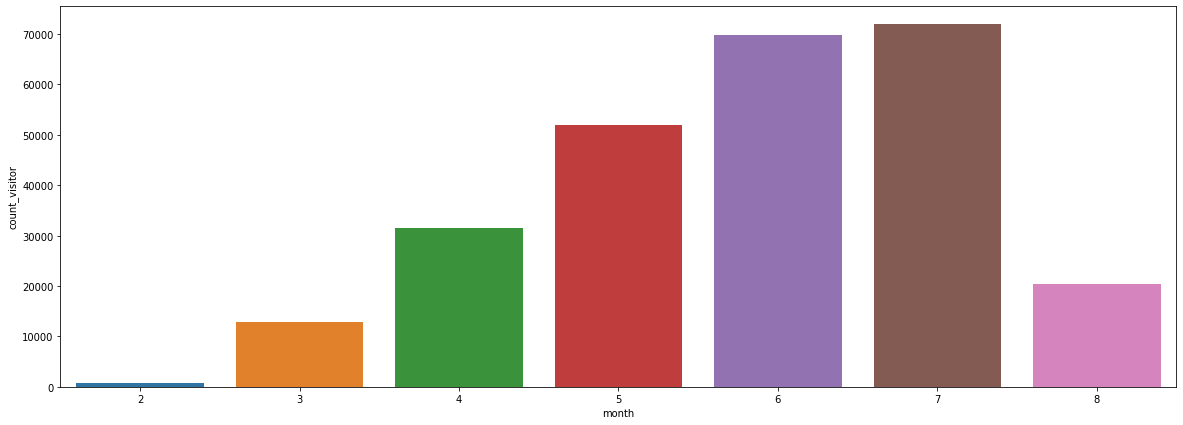

In [94]:
plt.rcParams['figure.figsize'] = (20.0, 7.0)
# fig, ax1 = plt.subplots(figsize=(20.0, 7.0))
(sns.barplot(data = (df_summary.query('count_page>5&count_direct_page==count_page&(count_srp.notnull()|count_lpd.notnull())')
 .groupby(['month'])['session_id'].count().reset_index().rename(columns = {'session_id':'count_visitor'})
),
             x='month', y='count_visitor')
)

In [ ]:
df_summary.groupby(['month'])['']

In [49]:
df_summary['avg_second_per_page']=df_summary['total_time_onsite']/df_summary['count_page']

In [58]:
(df_summary.query('count_page>30&avg_second_per_page<3')
 .groupby(['operating_system','operating_system_version',
           'device_browser','event_latitude','event_longitude','country'])['session_id'].count()
).reset_index().sort_values(by='session_id', ascending=False)

,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,session_id
52,Windows,10,Chrome,10.8231,106.6297,Vietnam,3835
73,Windows,10,Firefox,10.8231,106.6297,Vietnam,2737
64,Windows,10,Chrome,21.0278,105.8342,Vietnam,1070
12,Linux,x86_64,Firefox,0.0000,0.0000,Singapore,358
103,Windows,8.1,Chrome,10.8231,106.6297,Vietnam,287
...,...,...,...,...,...,...,...
80,Windows,10,Firefox,37.3382,-121.8863,United States,1
81,Windows,10,Firefox,37.6604,-121.8758,United States,1
33,Macintosh,Intel 10.8,Chrome,16.0544,108.2022,Vietnam,1
85,Windows,10,Firefox,44.9521,34.1024,Ukraine,1


In [73]:
df_summary[df_summary['session_id'].str.contains('2021-07-11')].query('count_page>30&avg_second_per_page<3&month==7&operating_system=="Linux"')

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page


In [81]:
(df_summary[df_summary['session_id'].str.contains('2021-07-11')]
 .query('operating_system=="Linux"&operating_system_version=="x86_64"&count_page==1')
).sort_values(by='count_page', ascending=False)

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page
5600725,7,100000294087021816616259690782021-07-11,Linux,x86_64,Chrome,10.9574,106.8427,Vietnam,1,NaN,1.0,NaN,1.0,NaN,1.0,NaN
6565400,7,650455704460452382116260027322021-07-11,Linux,x86_64,Chrome,1.3554,103.8677,Singapore,1,1.0,NaN,NaN,1.0,NaN,1.0,NaN
6565150,7,650318662361956217416259795812021-07-11,Linux,x86_64,Chrome,10.9574,106.8427,Vietnam,1,NaN,1.0,NaN,1.0,NaN,1.0,NaN
6565187,7,650339372264757612116259477052021-07-11,Linux,x86_64,Chrome,1.3554,103.8677,Singapore,1,NaN,1.0,NaN,1.0,NaN,1.0,NaN
6565235,7,650359087023639528716259458782021-07-11,Linux,x86_64,Chrome,10.9574,106.8427,Vietnam,1,1.0,NaN,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6084017,7,376063732693302222516260029612021-07-11,Linux,x86_64,Chrome,10.9574,106.8427,Vietnam,1,1.0,NaN,NaN,1.0,NaN,1.0,NaN
6083999,7,376055178406933268016259478482021-07-11,Linux,x86_64,Chrome,0.0000,0.0000,China,1,1.0,NaN,NaN,1.0,NaN,1.0,NaN
6083968,7,376034706445321542816259944352021-07-11,Linux,x86_64,Chrome,10.9574,106.8427,Vietnam,1,NaN,1.0,NaN,1.0,NaN,1.0,NaN
6083958,7,376026451088677430216259497262021-07-11,Linux,x86_64,Chrome,10.9574,106.8427,Vietnam,1,NaN,1.0,NaN,1.0,NaN,1.0,NaN


In [71]:
df_summary.query('count_page>30&avg_second_per_page>=3&month==7&operating_system=="Linux"')

,month,session_id,operating_system,operating_system_version,device_browser,event_latitude,event_longitude,country,count_page,count_srp,count_lpd,count_not_direct_page,count_direct_page,total_time_onsite,total_bounces,avg_second_per_page
5601484,7,100459396885115690516252599442021-07-03,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,117,NaN,117.0,NaN,117.0,3107.0,NaN,26.555556
5601727,7,100607681919505330616253104572021-07-03,Linux,x86_64,Firefox,21.0278,105.8342,Vietnam,117,NaN,117.0,NaN,117.0,2784.0,NaN,23.794872
5601794,7,100641352315745094416265381772021-07-17,Linux,x86_64,Firefox,1.3554,103.8677,Singapore,76,NaN,76.0,NaN,76.0,2140.0,NaN,28.157895
5603386,7,101501910431450280916257307132021-07-08,Linux,x86_64,Chrome,21.0278,105.8342,Vietnam,49,30.0,17.0,47.0,2.0,3130.0,NaN,63.877551
5605425,7,102667327473561013516274414312021-07-28,Linux,x86_64,Firefox,0.0000,0.0000,Singapore,242,242.0,NaN,NaN,242.0,1576.0,NaN,6.512397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7050142,7,96600473996494473616266202562021-07-18,Linux,x86_64,Firefox,11.1318,106.6073,Vietnam,244,244.0,NaN,NaN,244.0,975.0,NaN,3.995902
7051803,7,97501681400618095716252345252021-07-02,Linux,x86_64,Chrome,0.0000,0.0000,Hong Kong,256,14.0,242.0,NaN,256.0,1847.0,NaN,7.214844
7051805,7,97501681400618095716252442212021-07-03,Linux,x86_64,Chrome,0.0000,0.0000,Hong Kong,240,12.0,228.0,NaN,240.0,10080.0,NaN,42.000000
7052406,7,97837130372589075916276840382021-07-31,Linux,x86_64,Firefox,0.0000,0.0000,Singapore,31,NaN,31.0,NaN,31.0,1175.0,NaN,37.903226


In [68]:
df.query('visit_date=="2021-07-12"')

,visit_date,full_visitor_id,session_id,start_time,operating_system,operating_system_version,device_browser,browser_version,event_latitude,event_longitude,...,hits_host_name,page_path_search_type,hit_number,hits_entrance,hits_exit,custom_event_pay_load,custom_referrer_page,custom_referrer_page_type,custom_SRP_result_count,month


In [67]:
df.count()

visit_date                     25861361
full_visitor_id                25861361
session_id                     25861361
start_time                     25861361
operating_system               25861361
operating_system_version       25861361
device_browser                 25861361
browser_version                25861361
event_latitude                 25861361
event_longitude                25861361
city                           25861361
country                        25861361
total_bounces                   5599627
total_visits                   25861361
is_1st_user                    25861361
total_hits                     25861361
total_page_views               25861361
total_time_onsite              20242728
custom_headless_session        23688068
BDS_user_id                     6266000
custom_hash_IP                  2276022
hit_is_interaction             25861361
hit_time                       25861361
time_to_next_hit               25861361
content_group                  25861361
